# Pandas, Matplotlib and Seaborn

In [1]:
import pandas as pd

[Dataset Soruce](https://www.kaggle.com/datasets/rajkumarpandey02/gdp-in-usd-per-capita-income-by-country)

CONTENT
<p>The figures presented here do not take into account differences in the cost of living in different countries, and the results vary greatly from one year to another based on fluctuations in the exchange rates of the country's currency. Such fluctuations change a country's ranking from one year to the next, even though they often make little or no difference to the standard of living of its population.

GDP per capita is often considered an indicator of a country's standard of living; however, this is inaccurate because GDP per capita is not a measure of personal income.

Comparisons of national income are also frequently made on the basis of purchasing power parity (PPP), to adjust for differences in the cost of living in different countries. (See List of countries by GDP (PPP) per capita.) PPP largely removes the exchange rate problem but not others; it does not reflect the value of economic output in international trade, and it also requires more estimation than GDP per capita. On the whole, PPP per capita figures are more narrowly spread than nominal GDP per capita figures.</p>

Here are some resources to learn about GDP: 
#### [World Bank](https://data.worldbank.org/indicator/ny.gdp.pcap.cd?most_recent_value_desc=false)
#### [Our World in Data](https://ourworldindata.org/grapher/gdp-per-capita-worldbank)
#### [IMF](https://www.imf.org/external/datamapper/NGDPD@WEO/OEMDC/ADVEC/WEOWORLD)
#### [UN Data](https://data.un.org/Data.aspx?d=SNAAMA&f=grID%3A101%3BcurrID%3AUSD%3BpcFlag%3A1)



In [3]:
df = pd.read_csv("GDP (nominal) per Capita.csv",encoding= 'unicode_escape',  index_col=0)
df.head()

,Country/Territory,UN_Region,IMF_Estimate,IMF_Year,WorldBank_Estimate,WorldBank_Year,UN_Estimate,UN_Year
1,Monaco,Europe,0,0,234316,2021,234317,2021
2,Liechtenstein,Europe,0,0,157755,2020,169260,2021
3,Luxembourg,Europe,132372,2023,133590,2021,133745,2021
4,Ireland,Europe,114581,2023,100172,2021,101109,2021
5,Bermuda,Americas,0,0,114090,2021,112653,2021


## EDA (Exploratory Data Analysis)

### Use this section to explore and inspect dataset.

In [13]:
len(df)
# returns number of rows
# there are 223 countries

223

In [15]:
df.shape
# number of columns and rows

(223, 8)

In [17]:
df.dtypes

Country/Territory     object
UN_Region             object
IMF_Estimate           int64
IMF_Year               int64
WorldBank_Estimate     int64
WorldBank_Year         int64
UN_Estimate            int64
UN_Year               object
dtype: object

In [21]:
df["UN_Year"].value_counts()
# Un Year column has [n 10]2021. thats why pandas identfies this column as string

UN_Year
2021          213
0               9
[n 10]2021      1
Name: count, dtype: int64

In [25]:
# How to find [n 10]2021 in your dataframe ?
df.loc[df["UN_Year"]=="[n 10]2021"]


,Country/Territory,UN_Region,IMF_Estimate,IMF_Year,WorldBank_Estimate,WorldBank_Year,UN_Estimate,UN_Year
194,Tanzania,Africa,1348,2023,1099,2021,1136,[n 10]2021


In [31]:
df.isin(['[n 10]2021']).any().any()
# True means this value is found on my dataset

True

In [33]:
# How to remove [n 10] from dataset?

In [57]:
df["UN_Year"] = df["UN_Year"].str.replace("[n 10]2021", "2021")

In [59]:
df["UN_Year"].value_counts()


UN_Year
2021    214
0         9
Name: count, dtype: int64

In [65]:
df.isnull().sum()
# There are no null values in any column of my dataset

Country/Territory     0
UN_Region             0
IMF_Estimate          0
IMF_Year              0
WorldBank_Estimate    0
WorldBank_Year        0
UN_Estimate           0
UN_Year               0
dtype: int64

In [69]:
df.describe()
# Statistical summary#
# if mean is less than std you need to look for outliers in dataset

,IMF_Estimate,IMF_Year,WorldBank_Estimate,WorldBank_Year,UN_Estimate
count,223.000000,223.000000,223.000000,223.000000,223.000000
mean,15351.632287,1787.098655,18927.417040,1957.278027,17767.304933
std,22550.899445,650.695912,29103.564915,353.145867,28698.104167
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1406.500000,2023.000000,2273.500000,2021.000000,2039.000000
50%,5421.000000,2023.000000,6805.000000,2021.000000,6396.000000
75%,19697.000000,2023.000000,23715.000000,2021.000000,20740.000000
max,132372.000000,2023.000000,234316.000000,2021.000000,234317.000000


In [77]:
df.sort_values(by="UN_Estimate").head()

,Country/Territory,UN_Region,IMF_Estimate,IMF_Year,WorldBank_Estimate,WorldBank_Year,UN_Estimate,UN_Year
37,US Virgin Islands,Americas,0,0,39552,2020,0,0
42,Guam,Oceania,0,0,35905,2021,0,0
46,Taiwan,Asia,33907,2023,0,0,0,0
86,American Samoa,Oceania,0,0,15743,2021,0,0
65,Saint Martin (French part),Americas,0,0,21921,2014,0,0


In [81]:
df.sample(5)
# 5 random samples

,Country/Territory,UN_Region,IMF_Estimate,IMF_Year,WorldBank_Estimate,WorldBank_Year,UN_Estimate,UN_Year
17,Australia,Oceania,64964,2023,60443,2021,66916,2021
199,Uganda,Africa,1105,2023,884,2021,930,2021
119,Botswana,Africa,7270,2023,6805,2021,6805,2021
39,New Caledonia,Oceania,0,0,37160,2021,34994,2021
95,Turkmenistan,Asia,13065,2023,7345,2019,8508,2021


In [85]:
# What is GDP for United Kingdom ?
uk_gdp = df[df["Country/Territory"] == "United Kingdom"]["WorldBank_Estimate"]

In [87]:
uk_gdp

33    46510
Name: WorldBank_Estimate, dtype: int64

In [91]:
df[df["Country/Territory"] == "United Kingdom"]

,Country/Territory,UN_Region,IMF_Estimate,IMF_Year,WorldBank_Estimate,WorldBank_Year,UN_Estimate,UN_Year
33,United Kingdom,Europe,46371,2023,46510,2021,46542,2021


In [95]:
df[df["Country/Territory"] == "Turkey"]

,Country/Territory,UN_Region,IMF_Estimate,IMF_Year,WorldBank_Estimate,WorldBank_Year,UN_Estimate,UN_Year
99,Turkey,Asia,11931,2023,9661,2021,9661,2021


In [101]:
# number of countries per region
df["UN_Region"].value_counts()

UN_Region
Africa      55
Asia        51
Europe      48
Americas    48
Oceania     20
World        1
Name: count, dtype: int64

In [105]:
df[df["UN_Region"]=="World"]
# There is a country/territory as World

,Country/Territory,UN_Region,IMF_Estimate,IMF_Year,WorldBank_Estimate,WorldBank_Year,UN_Estimate,UN_Year
93,World,World,13440,2023,12235,2021,12230,2021


In [ ]:
#What is European Union[n 1]?

In [107]:
df[df["Country/Territory"]=="European Union[n 1]"]

,Country/Territory,UN_Region,IMF_Estimate,IMF_Year,WorldBank_Estimate,WorldBank_Year,UN_Estimate,UN_Year
36,European Union[n 1],Europe,39940,2023,38411,2021,31875,2021


In [125]:
df["IMF_Estimate"].mean()

15351.632286995517

In [129]:
df[df["UN_Region"]=="Europe"]

,Country/Territory,UN_Region,IMF_Estimate,IMF_Year,WorldBank_Estimate,WorldBank_Year,UN_Estimate,UN_Year
1,Monaco,Europe,0,0,234316,2021,234317,2021
2,Liechtenstein,Europe,0,0,157755,2020,169260,2021
3,Luxembourg,Europe,132372,2023,133590,2021,133745,2021
4,Ireland,Europe,114581,2023,100172,2021,101109,2021
6,Norway,Europe,101103,2023,89154,2021,89242,2021
7,Switzerland,Europe,98767,2023,91992,2021,93525,2021
9,Isle of Man,Europe,0,0,87158,2019,0,0
13,Iceland,Europe,75180,2023,68728,2021,69133,2021
14,Channel Islands,Europe,0,0,75153,2007,0,0
15,Faroe Islands,Europe,0,0,69010,2021,0,0


In [133]:
# Countries in Europe below avarege
df[(df["IMF_Estimate"]<df["IMF_Estimate"].mean()) & (df["UN_Region"]=="Europe") & (df["IMF_Estimate"] !=0)]

,Country/Territory,UN_Region,IMF_Estimate,IMF_Year,WorldBank_Estimate,WorldBank_Year,UN_Estimate,UN_Year
87,Bulgaria,Europe,14893,2023,12222,2021,12207,2021
90,Russia,Europe,14403,2023,12195,2021,12259,2021
103,Montenegro,Europe,11289,2023,9466,2021,9252,2021
106,Serbia,Europe,10849,2023,9230,2021,8643,2021
112,Bosnia and Herzegovina,Europe,8223,2023,7143,2021,7143,2021
115,Belarus,Europe,7944,2023,7302,2021,7121,2021
118,North Macedonia,Europe,7384,2023,6695,2021,6600,2021
120,Albania,Europe,7058,2023,6493,2021,6396,2021
127,Moldova,Europe,6342,2023,5231,2021,4468,2021
133,Kosovo,Europe,5641,2023,5270,2021,5663,2021


In [135]:
df[(df["IMF_Estimate"]>df["IMF_Estimate"].mean()) & (df["UN_Region"]=="Europe") & (df["IMF_Estimate"] !=0)]

,Country/Territory,UN_Region,IMF_Estimate,IMF_Year,WorldBank_Estimate,WorldBank_Year,UN_Estimate,UN_Year
3,Luxembourg,Europe,132372,2023,133590,2021,133745,2021
4,Ireland,Europe,114581,2023,100172,2021,101109,2021
6,Norway,Europe,101103,2023,89154,2021,89242,2021
7,Switzerland,Europe,98767,2023,91992,2021,93525,2021
13,Iceland,Europe,75180,2023,68728,2021,69133,2021
16,Denmark,Europe,68827,2023,68008,2021,68037,2021
18,Netherlands,Europe,61098,2023,57768,2021,57871,2021
20,Austria,Europe,56802,2023,53638,2021,53840,2021
22,Sweden,Europe,55395,2023,61029,2021,60730,2021
23,Finland,Europe,54351,2023,53655,2021,53703,2021


In [137]:
eu_df = df[df["UN_Region"] == "Europe"]
average_estimate = eu_df["IMF_Estimate"].mean()
below_average_countries = eu_df[eu_df["IMF_Estimate"] < average_estimate]
below_average_countries

,Country/Territory,UN_Region,IMF_Estimate,IMF_Year,WorldBank_Estimate,WorldBank_Year,UN_Estimate,UN_Year
1,Monaco,Europe,0,0,234316,2021,234317,2021
2,Liechtenstein,Europe,0,0,157755,2020,169260,2021
9,Isle of Man,Europe,0,0,87158,2019,0,0
14,Channel Islands,Europe,0,0,75153,2007,0,0
15,Faroe Islands,Europe,0,0,69010,2021,0,0
51,Slovenia,Europe,32214,2023,29291,2021,29135,2021
52,Czech Republic,Europe,31368,2023,26821,2021,26809,2021
53,Spain,Europe,31223,2023,30104,2021,30058,2021
54,Estonia,Europe,31209,2023,27944,2021,27991,2021
57,Lithuania,Europe,28094,2023,23723,2021,23844,2021


In [157]:
# Which countries in Europe has higher GDP than UK?
df[df["Country/Territory"] == "United Kingdom"]["WorldBank_Estimate"]

33    46510
Name: WorldBank_Estimate, dtype: int64

In [155]:
uk_gdp = df[df["Country/Territory"] == "United Kingdom"]["WorldBank_Estimate"].values[0]
uk_gdp

higher_gdp_countries = df[(df["UN_Region"] == "Europe") & (df["WorldBank_Estimate"] > uk_gdp)]
higher_gdp_countries

print(higher_gdp_countries[["Country/Territory", "WorldBank_Estimate"]])

   Country/Territory  WorldBank_Estimate
1             Monaco              234316
2      Liechtenstein              157755
3         Luxembourg              133590
4            Ireland              100172
6             Norway               89154
7        Switzerland               91992
9        Isle of Man               87158
13           Iceland               68728
14   Channel Islands               75153
15     Faroe Islands               69010
16           Denmark               68008
18       Netherlands               57768
20           Austria               53638
22            Sweden               61029
23           Finland               53655
24           Belgium               51247
28           Germany               51204


## groupby()

[Learn more about groupby](https://www.geeksforgeeks.org/pandas-groupby/)

In [161]:
df["UN_Region"].value_counts()

UN_Region
Africa      55
Asia        51
Europe      48
Americas    48
Oceania     20
World        1
Name: count, dtype: int64

In [167]:
df.groupby("UN_Region")["IMF_Estimate"].mean()
# Average IMF Estimate GDP for each region

UN_Region
Africa       2802.345455
Americas    11871.041667
Asia        16665.254902
Europe      34446.750000
Oceania      9133.150000
World       13440.000000
Name: IMF_Estimate, dtype: float64

In [171]:
df.groupby("UN_Region")["IMF_Estimate"].mean().sort_values()

UN_Region
Africa       2802.345455
Oceania      9133.150000
Americas    11871.041667
World       13440.000000
Asia        16665.254902
Europe      34446.750000
Name: IMF_Estimate, dtype: float64

In [173]:
# Average GDP per capita from World bank estimate 
df.groupby("UN_Region")["WorldBank_Estimate"].mean().sort_values()

UN_Region
Africa       2470.836364
World       12235.000000
Asia        13921.313725
Oceania     15113.650000
Americas    18565.125000
Europe      45193.687500
Name: WorldBank_Estimate, dtype: float64

In [179]:
df[(df["WorldBank_Estimate"]==0) & (df["UN_Region"]=="Europe")]

,Country/Territory,UN_Region,IMF_Estimate,IMF_Year,WorldBank_Estimate,WorldBank_Year,UN_Estimate,UN_Year


In [183]:
df[(df["IMF_Estimate"]==0) & (df["UN_Region"]=="Europe")]

,Country/Territory,UN_Region,IMF_Estimate,IMF_Year,WorldBank_Estimate,WorldBank_Year,UN_Estimate,UN_Year
1,Monaco,Europe,0,0,234316,2021,234317,2021
2,Liechtenstein,Europe,0,0,157755,2020,169260,2021
9,Isle of Man,Europe,0,0,87158,2019,0,0
14,Channel Islands,Europe,0,0,75153,2007,0,0
15,Faroe Islands,Europe,0,0,69010,2021,0,0


In [185]:
# Average GDP per capita from UN estimate 
df.groupby("UN_Region")["UN_Estimate"].mean().sort_values()

UN_Region
Africa       2417.927273
World       12230.000000
Oceania     12613.750000
Asia        14069.019608
Americas    18703.750000
Europe      40610.791667
Name: UN_Estimate, dtype: float64

In [203]:
df.head(10)

,Country/Territory,UN_Region,IMF_Estimate,IMF_Year,WorldBank_Estimate,WorldBank_Year,UN_Estimate,UN_Year
1,Monaco,Europe,0,0,234316,2021,234317,2021
2,Liechtenstein,Europe,0,0,157755,2020,169260,2021
3,Luxembourg,Europe,132372,2023,133590,2021,133745,2021
4,Ireland,Europe,114581,2023,100172,2021,101109,2021
5,Bermuda,Americas,0,0,114090,2021,112653,2021
6,Norway,Europe,101103,2023,89154,2021,89242,2021
7,Switzerland,Europe,98767,2023,91992,2021,93525,2021
8,Singapore,Asia,91100,2023,72794,2021,66822,2021
9,Isle of Man,Europe,0,0,87158,2019,0,0
10,Cayman Islands,Americas,0,0,86569,2021,85250,2021


## Which countries below average by IMF world estimate?

### IMF estimate 0 values

In [207]:
len(df[df["IMF_Estimate"]==0])

26

In [209]:
df[df["IMF_Estimate"]==0]

,Country/Territory,UN_Region,IMF_Estimate,IMF_Year,WorldBank_Estimate,WorldBank_Year,UN_Estimate,UN_Year
1,Monaco,Europe,0,0,234316,2021,234317,2021
2,Liechtenstein,Europe,0,0,157755,2020,169260,2021
5,Bermuda,Americas,0,0,114090,2021,112653,2021
9,Isle of Man,Europe,0,0,87158,2019,0,0
10,Cayman Islands,Americas,0,0,86569,2021,85250,2021
14,Channel Islands,Europe,0,0,75153,2007,0,0
15,Faroe Islands,Europe,0,0,69010,2021,0,0
19,Greenland,Americas,0,0,54571,2020,58185,2021
31,British Virgin Islands,Americas,0,0,0,0,49444,2021
37,US Virgin Islands,Americas,0,0,39552,2020,0,0


## Which country has highest UN Estimate?

In [214]:
df.nlargest(1, "UN_Estimate")

,Country/Territory,UN_Region,IMF_Estimate,IMF_Year,WorldBank_Estimate,WorldBank_Year,UN_Estimate,UN_Year
1,Monaco,Europe,0,0,234316,2021,234317,2021


## Which country has highest Worlbank Estimate?

In [218]:
worldbank_max = df["WorldBank_Estimate"].max()

In [232]:
df[df["WorldBank_Estimate" ]== worldbank_max]

,Country/Territory,UN_Region,IMF_Estimate,IMF_Year,WorldBank_Estimate,WorldBank_Year,UN_Estimate,UN_Year
1,Monaco,Europe,0,0,234316,2021,234317,2021


## Which country has highest IMF Estimate?

In [238]:
df.loc[df["IMF_Estimate"].idxmax()]

Country/Territory     Luxembourg
UN_Region                 Europe
IMF_Estimate              132372
IMF_Year                    2023
WorldBank_Estimate        133590
WorldBank_Year              2021
UN_Estimate               133745
UN_Year                     2021
Name: 3, dtype: object

## Filling 0 Values by average

In [243]:
import numpy as np
# I will use numpy library for replacing 0 values with null values

In [247]:
df.loc[df["IMF_Estimate"]==0]

,Country/Territory,UN_Region,IMF_Estimate,IMF_Year,WorldBank_Estimate,WorldBank_Year,UN_Estimate,UN_Year
1,Monaco,Europe,0,0,234316,2021,234317,2021
2,Liechtenstein,Europe,0,0,157755,2020,169260,2021
5,Bermuda,Americas,0,0,114090,2021,112653,2021
9,Isle of Man,Europe,0,0,87158,2019,0,0
10,Cayman Islands,Americas,0,0,86569,2021,85250,2021
14,Channel Islands,Europe,0,0,75153,2007,0,0
15,Faroe Islands,Europe,0,0,69010,2021,0,0
19,Greenland,Americas,0,0,54571,2020,58185,2021
31,British Virgin Islands,Americas,0,0,0,0,49444,2021
37,US Virgin Islands,Americas,0,0,39552,2020,0,0


In [255]:
# replace 0 with null values
df["IMF_Estimate"] = df["IMF_Estimate"].replace(0, pd.NA)

In [257]:
df.head()

,Country/Territory,UN_Region,IMF_Estimate,IMF_Year,WorldBank_Estimate,WorldBank_Year,UN_Estimate,UN_Year
1,Monaco,Europe,<NA>,0,234316,2021,234317,2021
2,Liechtenstein,Europe,<NA>,0,157755,2020,169260,2021
3,Luxembourg,Europe,132372,2023,133590,2021,133745,2021
4,Ireland,Europe,114581,2023,100172,2021,101109,2021
5,Bermuda,Americas,<NA>,0,114090,2021,112653,2021


In [259]:
df.isnull().sum()

Country/Territory      0
UN_Region              0
IMF_Estimate          26
IMF_Year               0
WorldBank_Estimate     0
WorldBank_Year         0
UN_Estimate            0
UN_Year                0
dtype: int64

In [261]:
df["IMF_Estimate"].mean()

17377.736040609136

In [263]:
df.groupby("UN_Region")["IMF_Estimate"].mean()

UN_Region
Africa       2854.240741
Americas    15828.055556
Asia        17345.469388
Europe      38452.186047
Oceania     13047.357143
World            13440.0
Name: IMF_Estimate, dtype: object

In [287]:
df.sample(6)

,Country/Territory,UN_Region,IMF_Estimate,IMF_Year,WorldBank_Estimate,WorldBank_Year,UN_Estimate,UN_Year
41,Italy,Europe,36812,2023,35658,2021,35579,2021
178,Ghana,Africa,2024,2023,2363,2021,2409,2021
126,Colombia,Americas,6417,2023,6104,2021,6104,2021
38,Puerto Rico,Americas,38567,2023,32641,2021,32716,2021
10,Cayman Islands,Americas,<NA>,0,86569,2021,85250,2021
15,Faroe Islands,Europe,<NA>,0,69010,2021,0,0


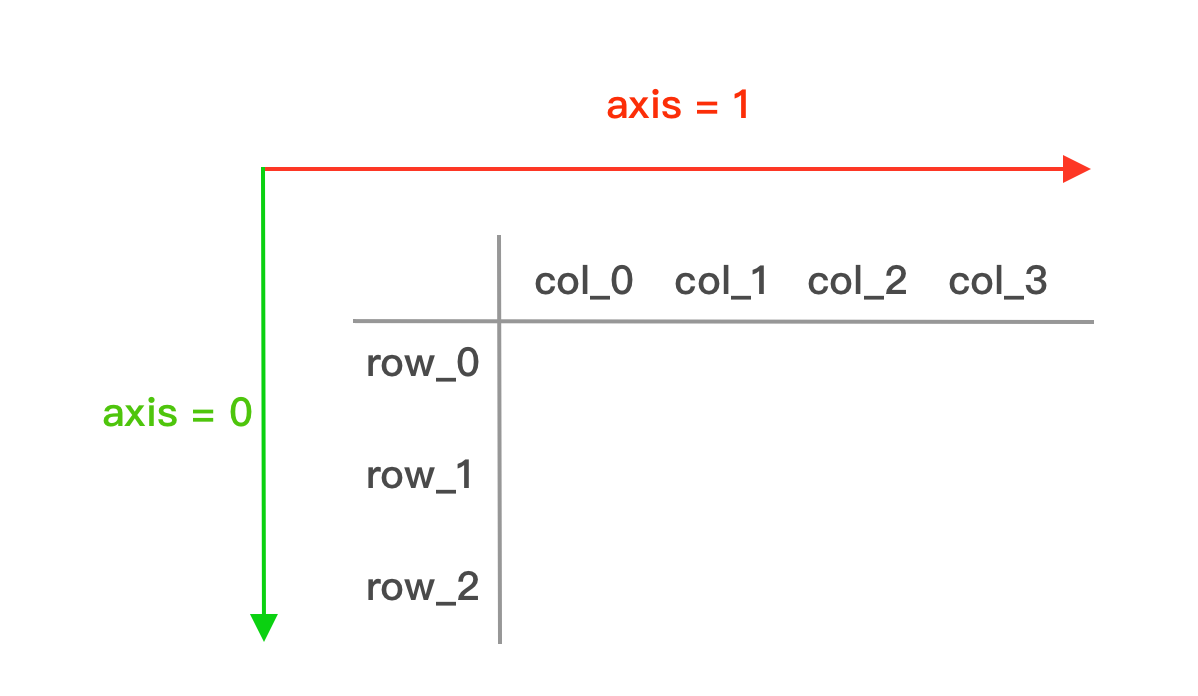


In [289]:
# Calculate the average of 'worldbank' and 'un' columns
avg_worldbank_un = df[["WorldBank_Estimate","UN_Estimate"]].mean(axis=1)

In [301]:
#ignore the warning
pd.set_option('future.no_silent_downcasting', True)

In [299]:
# Fill the null values in 'imf' column with the calculated average
df["IMF_Estimate"] = df["IMF_Estimate"].fillna(avg_worldbank_un)

In [295]:
df.head()

,Country/Territory,UN_Region,IMF_Estimate,IMF_Year,WorldBank_Estimate,WorldBank_Year,UN_Estimate,UN_Year
1,Monaco,Europe,234316.5,0,234316,2021,234317,2021
2,Liechtenstein,Europe,163507.5,0,157755,2020,169260,2021
3,Luxembourg,Europe,132372.0,2023,133590,2021,133745,2021
4,Ireland,Europe,114581.0,2023,100172,2021,101109,2021
5,Bermuda,Americas,113371.5,0,114090,2021,112653,2021


In [144]:
# Drop the temporary 'avg_worldbank_un' column if not needed


[Visit this link to learn more about ffill](https://www.w3schools.com/python/pandas/ref_df_ffill.asp)

[Visit this link to learn more about bfill](https://www.w3schools.com/python/pandas/ref_df_bfill.asp)

## Checking Missing Values

In [304]:
df.isnull().sum()

Country/Territory     0
UN_Region             0
IMF_Estimate          0
IMF_Year              0
WorldBank_Estimate    0
WorldBank_Year        0
UN_Estimate           0
UN_Year               0
dtype: int64

## Visualization

In [308]:
import matplotlib.pyplot as plt
import seaborn as sns

### Histogram

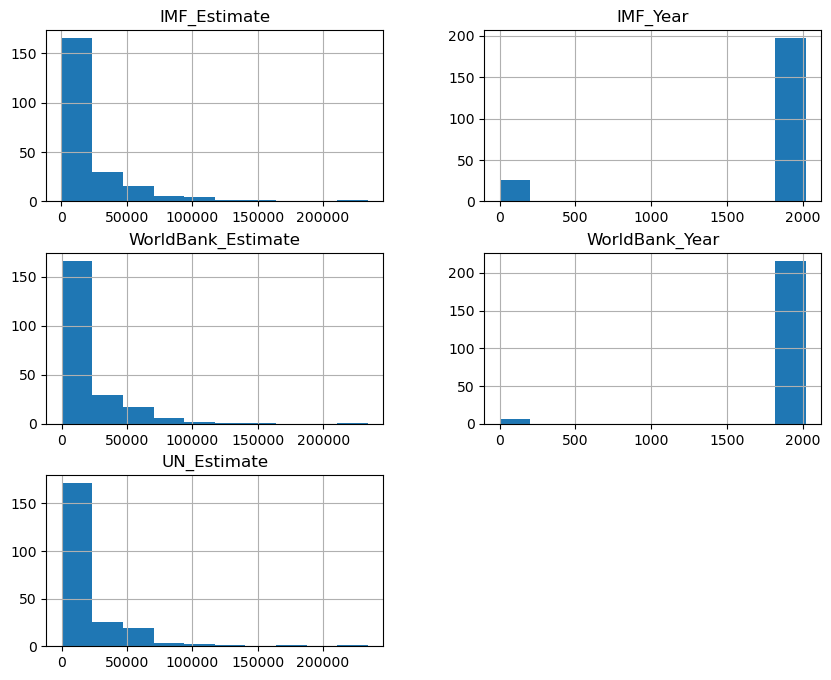

In [310]:
df.hist(figsize=(10,8))
plt.show()

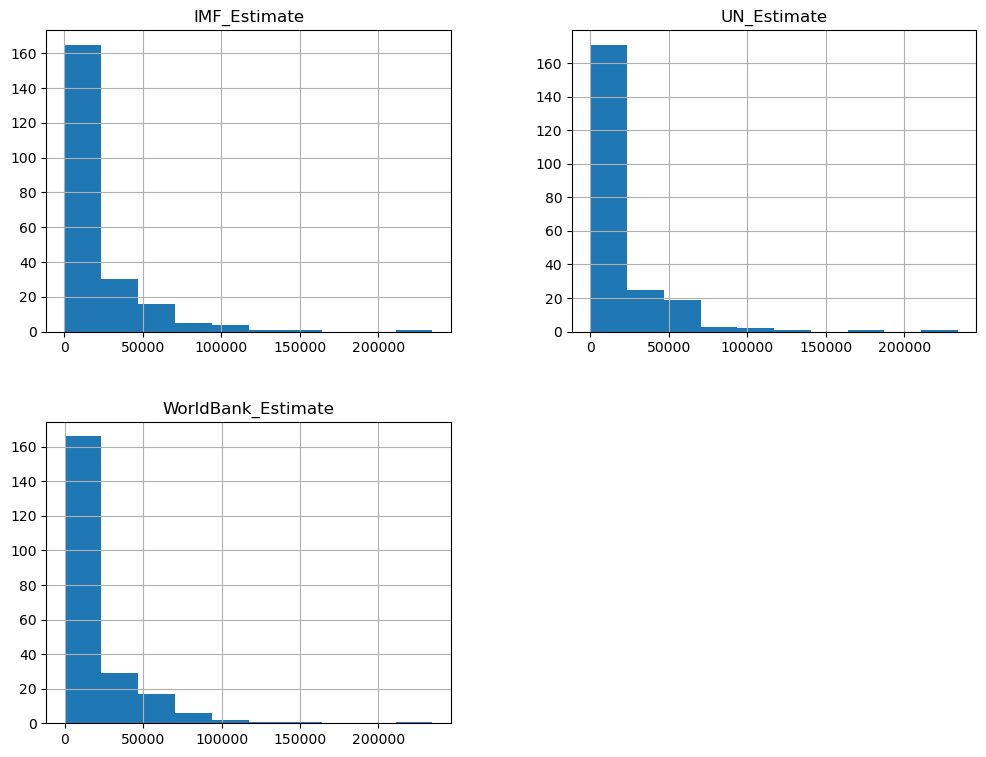

In [314]:
df[["IMF_Estimate", "UN_Estimate", "WorldBank_Estimate"]].hist(figsize=(12,9))

plt.show()
# according to IMF Estimate more than 160 countries have GDP inth first bin
# bin size calculated by (max-min)/10 

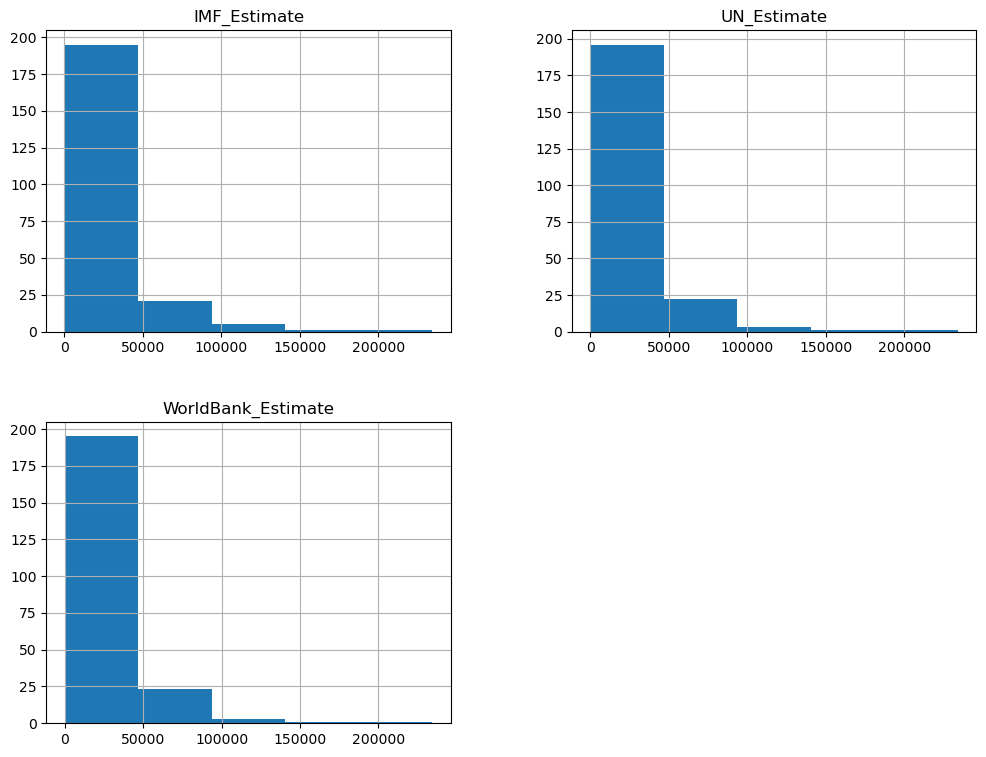

In [318]:
df[["IMF_Estimate", "UN_Estimate", "WorldBank_Estimate"]].hist(bins=5, figsize=(12,9))

plt.show()
#  when bins=5. there will be 5 bins for all values

In [ ]:
# almost 200 countries have their gdp in the first bin 0-46000

In [320]:
df["WorldBank_Estimate"].agg(["min","max"])

min         0
max    234316
Name: WorldBank_Estimate, dtype: int64

In [324]:
df["WorldBank_Estimate"].agg(["mean","median"])

mean      18927.41704
median     6805.00000
Name: WorldBank_Estimate, dtype: float64

In [322]:
234316/5
#1 bin size if bins=5
# first bin extends from 0 to 46863.2

46863.2

In [326]:
df[df["WorldBank_Estimate"]<=46863.2]["WorldBank_Estimate"].count()
# 195 countries have gpd less than or equal to 46863.2

195

In [328]:
234316/10
#1 bin size if bins not given any number

23431.6

In [330]:
df[df["WorldBank_Estimate"]<=23431.6]["WorldBank_Estimate"].count()
# 166 countries have gpd less than or equal to 23431.6

166

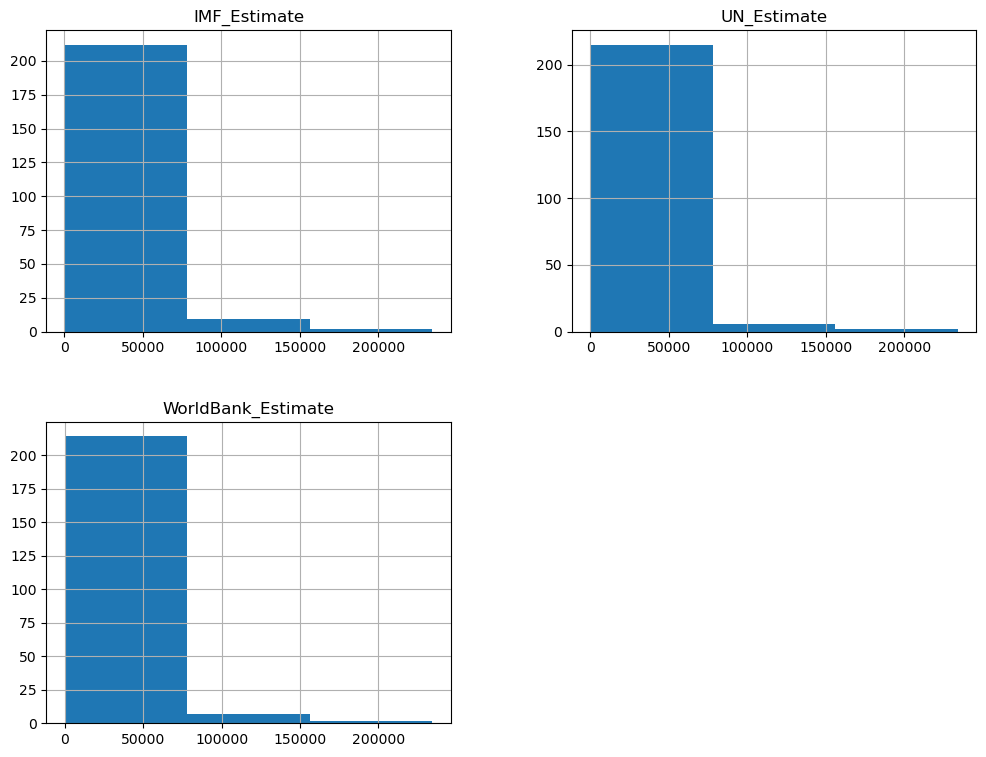

In [332]:
df[["IMF_Estimate", "UN_Estimate", "WorldBank_Estimate"]].hist(bins=3, figsize=(12,9))

plt.show()

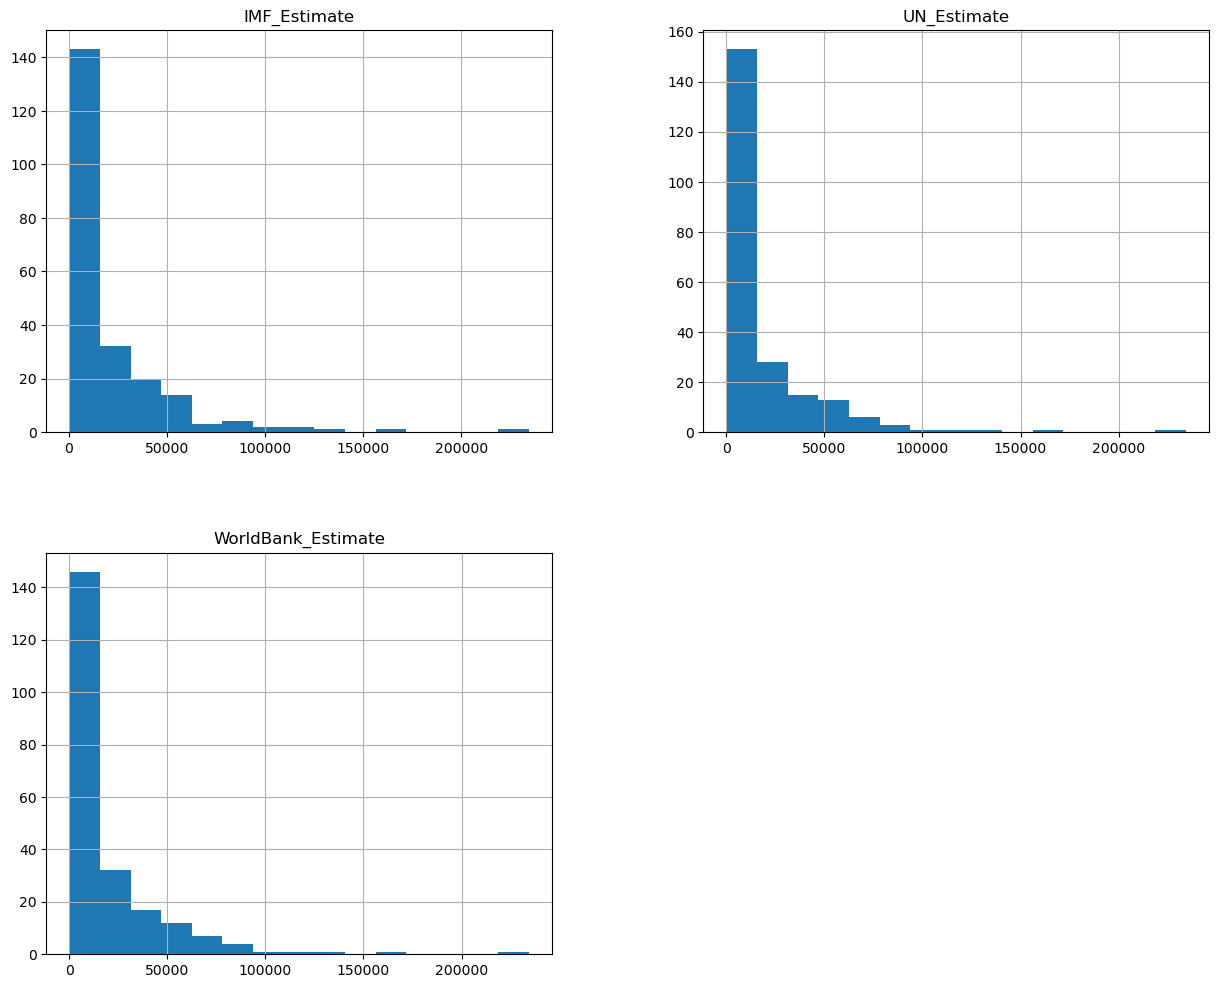

In [338]:
df[["IMF_Estimate", "UN_Estimate", "WorldBank_Estimate"]].hist(bins=15, figsize=(15,12))

#23400/15 = 15300
# more than 140 countries have their gdp less than or equal to 15300
plt.show()

In [336]:
df[df["UN_Estimate"]==0]

,Country/Territory,UN_Region,IMF_Estimate,IMF_Year,WorldBank_Estimate,WorldBank_Year,UN_Estimate,UN_Year
9,Isle of Man,Europe,43579.0,0,87158,2019,0,0
14,Channel Islands,Europe,37576.5,0,75153,2007,0,0
15,Faroe Islands,Europe,34505.0,0,69010,2021,0,0
37,US Virgin Islands,Americas,19776.0,0,39552,2020,0,0
42,Guam,Oceania,17952.5,0,35905,2021,0,0
46,Taiwan,Asia,33907.0,2023,0,0,0,0
61,Northern Mariana Islands,Oceania,11853.5,0,23707,2019,0,0
65,Saint Martin (French part),Americas,10960.5,0,21921,2014,0,0
86,American Samoa,Oceania,7871.5,0,15743,2021,0,0


### Correlation Heatmap

In [340]:
df[["IMF_Estimate", "UN_Estimate", "WorldBank_Estimate"]].corr()

,IMF_Estimate,UN_Estimate,WorldBank_Estimate
IMF_Estimate,1.000000,0.976263,0.974294
UN_Estimate,0.976263,1.000000,0.930331
WorldBank_Estimate,0.974294,0.930331,1.000000


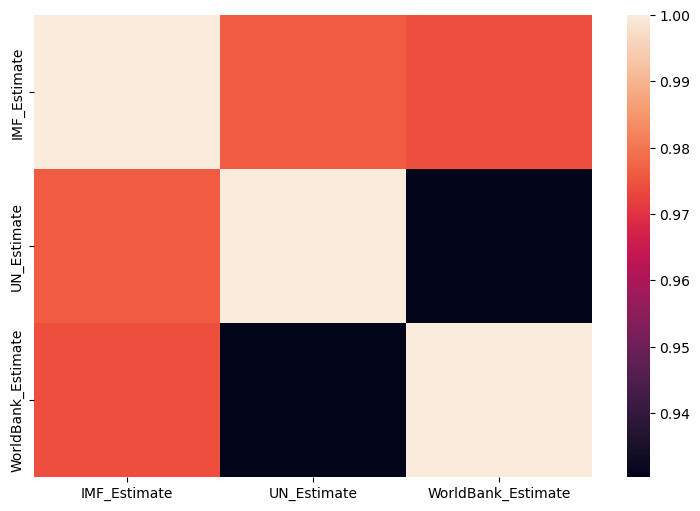

In [342]:
corr = df[["IMF_Estimate", "UN_Estimate", "WorldBank_Estimate"]].corr()

plt.figure(figsize=(9,6))
sns.heatmap(corr)

plt.show()

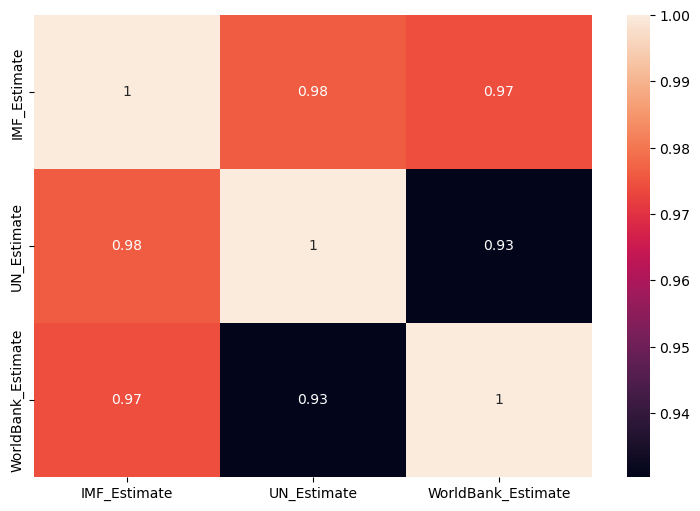

In [344]:
corr = df[["IMF_Estimate", "UN_Estimate", "WorldBank_Estimate"]].corr()

plt.figure(figsize=(9,6))

sns.heatmap(corr, annot=True)

plt.show()

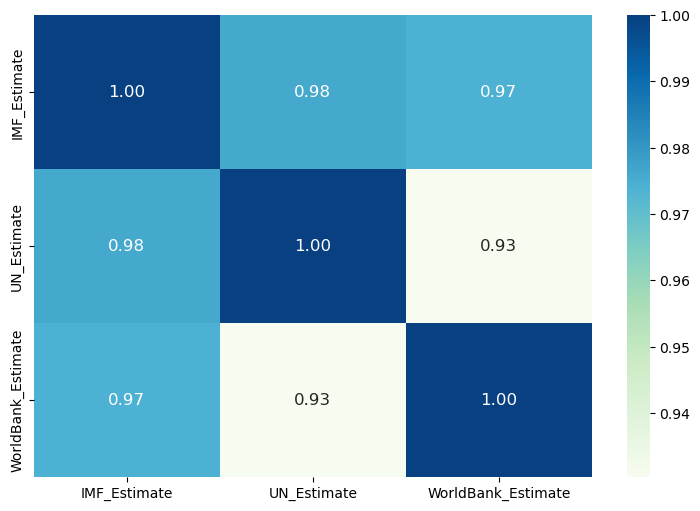

In [346]:
corr = df[["IMF_Estimate", "UN_Estimate", "WorldBank_Estimate"]].corr()

plt.figure(figsize=(9,6))

sns.heatmap(corr, annot=True, fmt=".2f", cmap = 'GnBu', annot_kws={"size": 12})

plt.show()

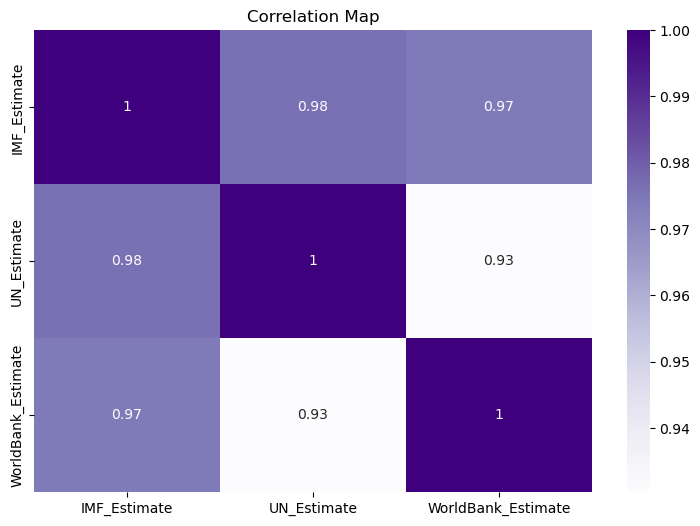

In [348]:
corr = df[["IMF_Estimate", "UN_Estimate", "WorldBank_Estimate"]].corr()

plt.figure(figsize=(9,6))

sns.heatmap(corr, annot=True, cmap = 'Purples')

plt.title("Correlation Map")


plt.show()

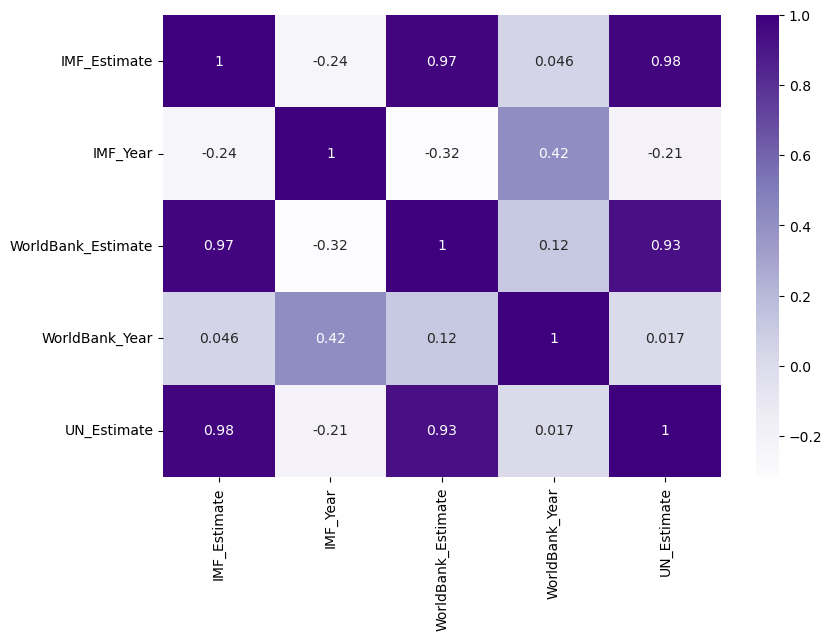

In [350]:
corr = df.select_dtypes(include=[int, float]).corr()
 
plt.figure(figsize=(9,6))
 
sns.heatmap(corr, annot=True, cmap = 'Purples')
 
plt.show()

### Bar plot

In [352]:
df.head()

,Country/Territory,UN_Region,IMF_Estimate,IMF_Year,WorldBank_Estimate,WorldBank_Year,UN_Estimate,UN_Year
1,Monaco,Europe,234316.5,0,234316,2021,234317,2021
2,Liechtenstein,Europe,163507.5,0,157755,2020,169260,2021
3,Luxembourg,Europe,132372.0,2023,133590,2021,133745,2021
4,Ireland,Europe,114581.0,2023,100172,2021,101109,2021
5,Bermuda,Americas,113371.5,0,114090,2021,112653,2021


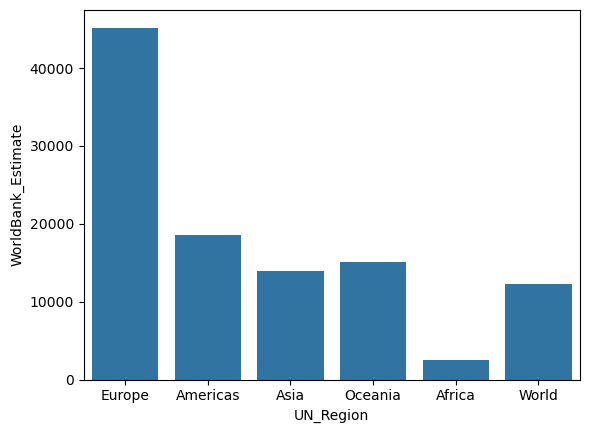

In [354]:
sns.barplot(x="UN_Region", y="WorldBank_Estimate", data=df, errorbar=None)

plt.show()

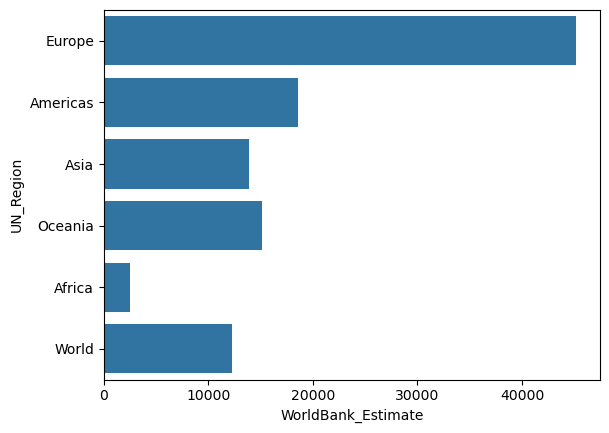

In [356]:
sns.barplot(x="WorldBank_Estimate", y="UN_Region", data=df, errorbar=None)

plt.show()

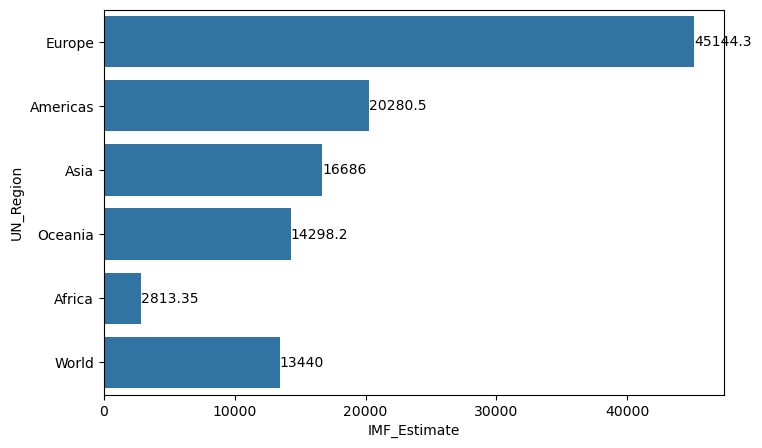

In [358]:
fig = plt.figure(figsize = (8,5))

ax = sns.barplot(x = "IMF_Estimate",  y = "UN_Region",  
data = df, errorbar = None)

ax.bar_label(ax.containers[0])

plt.show()

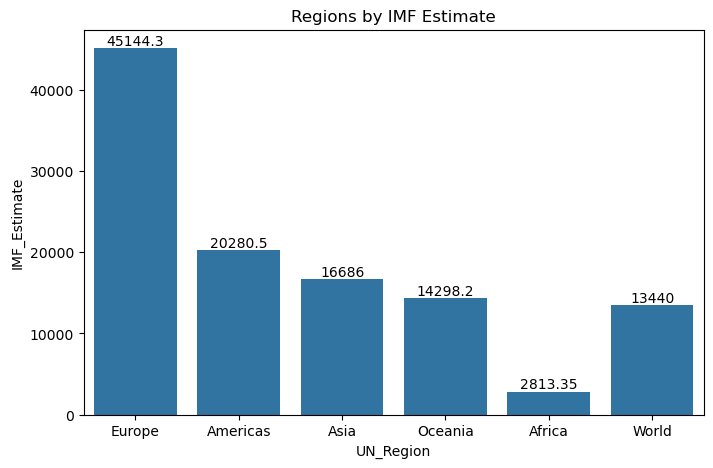

In [360]:
fig = plt.figure(figsize = (8,5)) 
ax = sns.barplot(x = "UN_Region",  y = "IMF_Estimate", 
                 data = df, errorbar = None) 

ax.bar_label(ax.containers[0]) 


ax.set_title("Regions by IMF Estimate")
plt.show()

### Scatter Plot

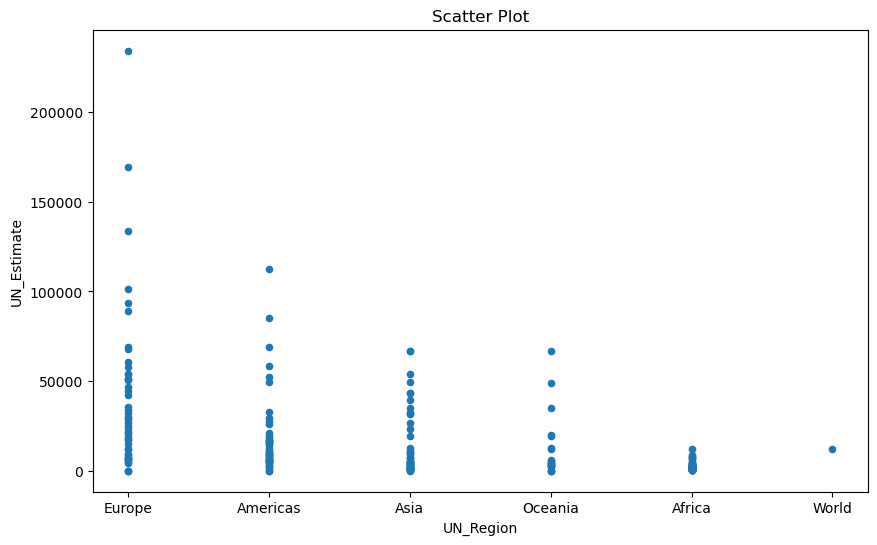

In [362]:
df.plot(x='UN_Region', y='UN_Estimate', kind='scatter',
        figsize=(10,6),
        title="Scatter Plot")

plt.show()

In [364]:
df[df["UN_Estimate"]>=100000]

,Country/Territory,UN_Region,IMF_Estimate,IMF_Year,WorldBank_Estimate,WorldBank_Year,UN_Estimate,UN_Year
1,Monaco,Europe,234316.5,0,234316,2021,234317,2021
2,Liechtenstein,Europe,163507.5,0,157755,2020,169260,2021
3,Luxembourg,Europe,132372.0,2023,133590,2021,133745,2021
4,Ireland,Europe,114581.0,2023,100172,2021,101109,2021
5,Bermuda,Americas,113371.5,0,114090,2021,112653,2021


### Boxplot and Outliers

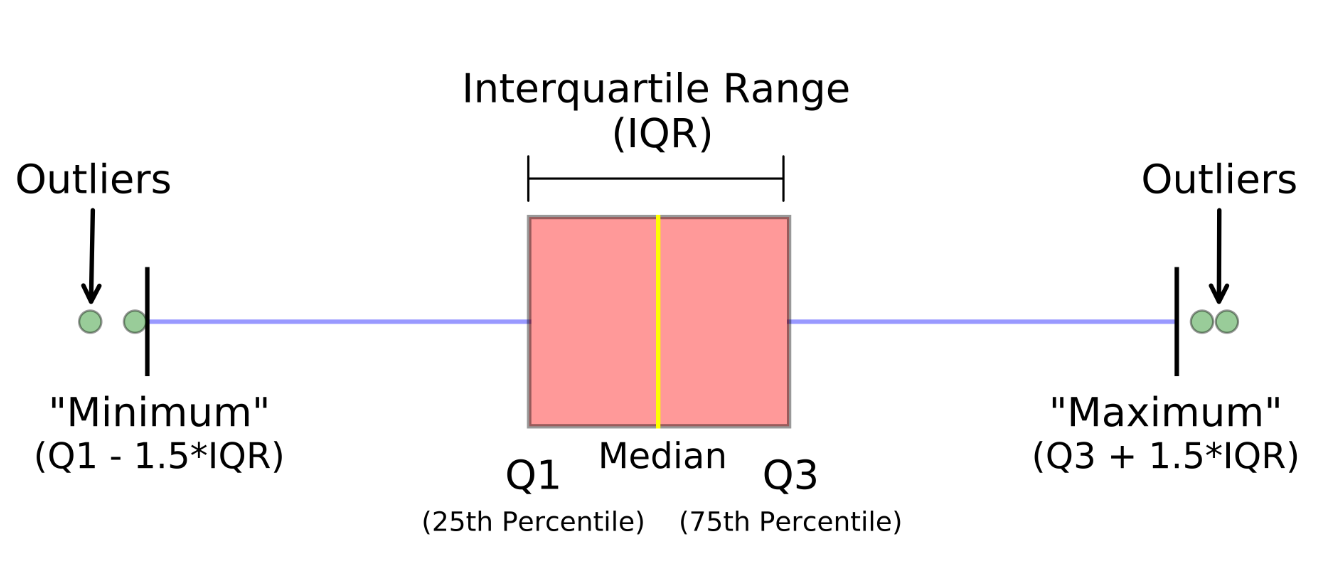

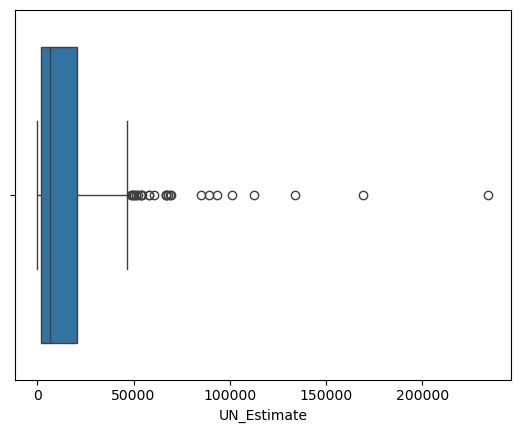

In [366]:
sns.boxplot(x=df["UN_Estimate"])

plt.show()

In [370]:
df[df["UN_Estimate"]>=50000].head()

,Country/Territory,UN_Region,IMF_Estimate,IMF_Year,WorldBank_Estimate,WorldBank_Year,UN_Estimate,UN_Year
1,Monaco,Europe,234316.5,0,234316,2021,234317,2021
2,Liechtenstein,Europe,163507.5,0,157755,2020,169260,2021
3,Luxembourg,Europe,132372.0,2023,133590,2021,133745,2021
4,Ireland,Europe,114581.0,2023,100172,2021,101109,2021
5,Bermuda,Americas,113371.5,0,114090,2021,112653,2021


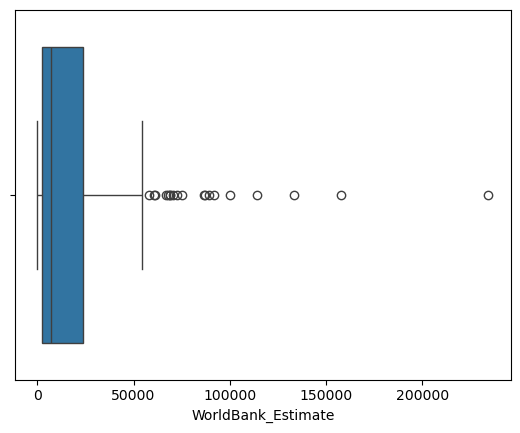

In [372]:
sns.boxplot(x=df["WorldBank_Estimate"])

plt.show()

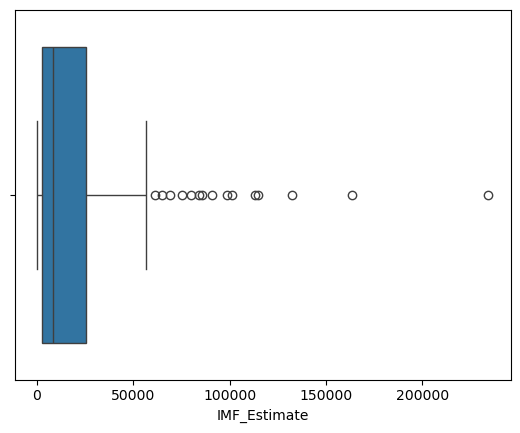

In [374]:
sns.boxplot(x=df["IMF_Estimate"])

plt.show()

In [376]:
df[df["UN_Estimate"]>100000]

,Country/Territory,UN_Region,IMF_Estimate,IMF_Year,WorldBank_Estimate,WorldBank_Year,UN_Estimate,UN_Year
1,Monaco,Europe,234316.5,0,234316,2021,234317,2021
2,Liechtenstein,Europe,163507.5,0,157755,2020,169260,2021
3,Luxembourg,Europe,132372.0,2023,133590,2021,133745,2021
4,Ireland,Europe,114581.0,2023,100172,2021,101109,2021
5,Bermuda,Americas,113371.5,0,114090,2021,112653,2021


In [378]:
df.UN_Estimate.mean()

17767.304932735427

In [380]:
df.shape

(223, 8)

## Create another dataframe called data excluding  5 countries with highest UN estimate

In [382]:
data = df[-(df["UN_Estimate"]>100000)]

In [384]:
data.head()

,Country/Territory,UN_Region,IMF_Estimate,IMF_Year,WorldBank_Estimate,WorldBank_Year,UN_Estimate,UN_Year
6,Norway,Europe,101103.0,2023,89154,2021,89242,2021
7,Switzerland,Europe,98767.0,2023,91992,2021,93525,2021
8,Singapore,Asia,91100.0,2023,72794,2021,66822,2021
9,Isle of Man,Europe,43579.0,0,87158,2019,0,0
10,Cayman Islands,Americas,85909.5,0,86569,2021,85250,2021


In [386]:
data.shape

(218, 8)

In [388]:
data.UN_Estimate.mean()

14729.47247706422

In [390]:
df.UN_Estimate.mean()

17767.304932735427

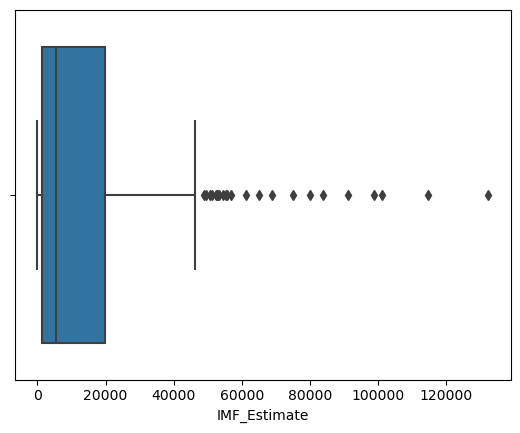

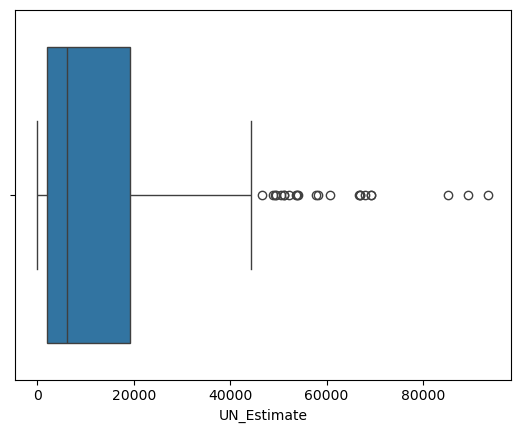

In [392]:
sns.boxplot(x=data["UN_Estimate"])
plt.show()

## Removing outliers

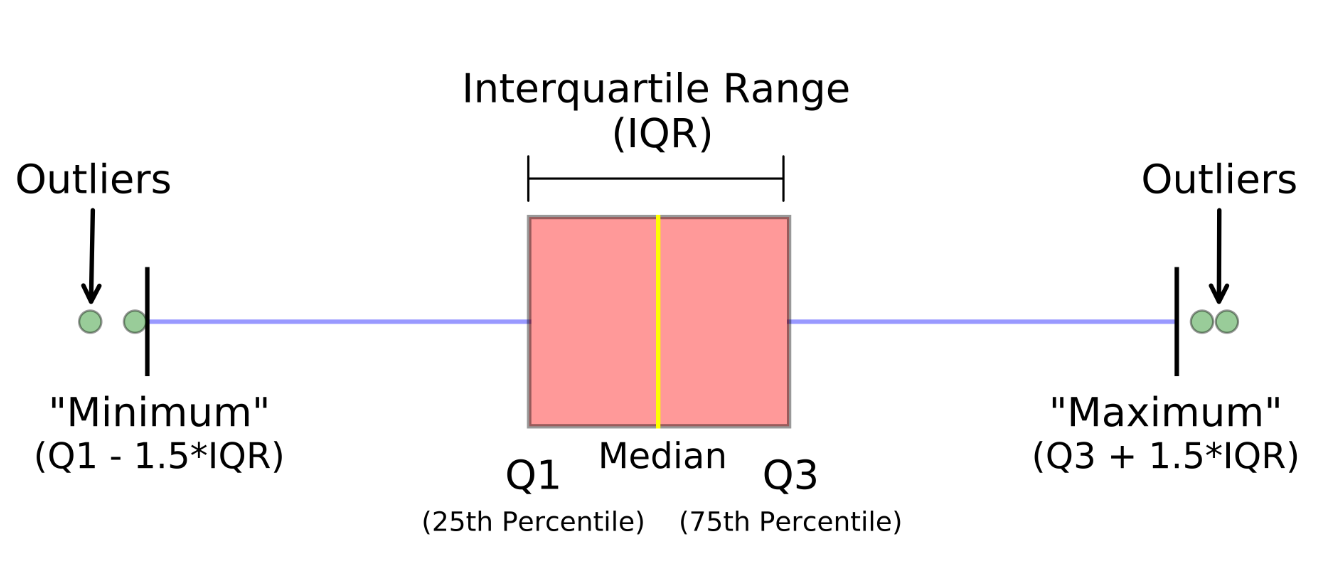

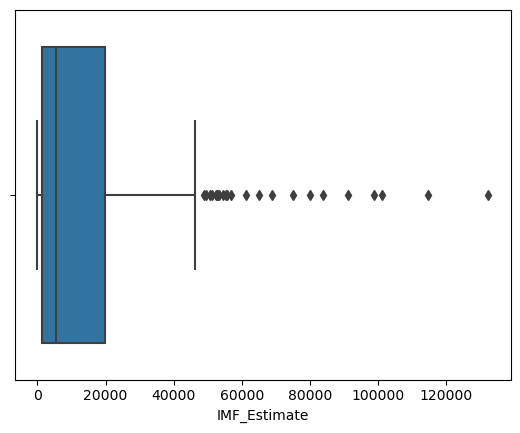

In [394]:
lower_q = df["UN_Estimate"].quantile(0.25)
lower_q
# 25 percent of all countries and territories have gdp by un is equal to or less than 2039

2039.0

In [398]:
higher_q = df["UN_Estimate"].quantile(0.75)
higher_q
# 75 percent of all countries and territories have gdp by un is equal to or less than 20740

20740.0

In [400]:
iqr = higher_q - lower_q
iqr

18701.0

In [402]:
upper_boundary = higher_q + 1.5 * iqr
upper_boundary

48791.5

In [404]:
lower_boundary = lower_q - 1.5 * iqr
lower_boundary

-26012.5

In [406]:
df_filtered = df[(df["UN_Estimate"] < upper_boundary) & (df["UN_Estimate"] > lower_boundary)]

In [408]:
df_filtered.head()

,Country/Territory,UN_Region,IMF_Estimate,IMF_Year,WorldBank_Estimate,WorldBank_Year,UN_Estimate,UN_Year
9,Isle of Man,Europe,43579.0,0,87158,2019,0,0
14,Channel Islands,Europe,37576.5,0,75153,2007,0,0
15,Faroe Islands,Europe,34505.0,0,69010,2021,0,0
29,Macau,Asia,50571.0,2023,43874,2021,43555,2021
30,United Arab Emirates,Asia,49451.0,2023,44316,2021,43295,2021


In [410]:
df_filtered.shape
# there were 223 rows - 196 = 27 outliers dropped

(196, 8)

In [412]:
df_filtered.UN_Estimate.mean()

9415.168367346938

In [414]:
df.UN_Estimate.mean()

17767.304932735427

In [416]:
#how can we create a table with following 
df_filtered.WorldBank_Estimate.mean()

11096.647959183674

In [418]:
df.WorldBank_Estimate.mean()

18927.417040358745

In [420]:
df_filtered.IMF_Estimate.mean()

11538.908163265307

In [422]:
df.IMF_Estimate.mean()

19935.053811659192